In [1]:
import pandas as pd
import numpy as np 
import mlflow
from pycaret.classification import *

In [12]:
df = pd.read_csv('../data/creditcard.csv')
data_drop = df.sample(frac=0.9, random_state=42)
df = df.drop(index = data_drop.index)
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
15,12.0,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [13]:
data_unseen = df.sample(frac=0.1, random_state=42)
df = df.drop(index = data_unseen.index)

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
data_unseen.to_csv('../data/test.csv')

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (25633, 31)
Unseen Data For Predictions: (2848, 31)


In [14]:
expt_basic = setup(
    data = df,
    target = 'Class',
    train_size = 0.8,
    normalize = True,
    normalize_method = 'zscore',
    numeric_imputation = 'median',
    categorical_imputation = 'mode',
    log_experiment = True,
    experiment_name = 'Credit Card Fraud - Expt 2',
    log_plots = True,
)

,Description,Value
0,session_id,7518
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(25633, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
top2 = compare_models(sort = "F1", n_select = 5, fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9996,0.9479,0.8711,0.8947,0.8826,0.8824,0.8825,0.1100
knn,K Neighbors Classifier,0.9993,0.9603,0.7184,0.8784,0.7889,0.7885,0.7933,4.6900
ada,Ada Boost Classifier,0.9993,0.9955,0.7158,0.8706,0.7854,0.7850,0.7889,1.2450
et,Extra Trees Classifier,0.9992,0.9730,0.6605,0.8373,0.7282,0.7278,0.7380,0.6550
lr,Logistic Regression,0.9991,0.9860,0.6408,0.8333,0.7244,0.7239,0.7302,2.5000
lightgbm,Light Gradient Boosting Machine,0.9989,0.9329,0.7408,0.7269,0.7225,0.7220,0.7276,0.3500
rf,Random Forest Classifier,0.9991,0.9603,0.6355,0.8110,0.7026,0.7021,0.7123,0.7300
svm,SVM - Linear Kernel,0.9989,0.0000,0.5105,0.8252,0.6303,0.6298,0.6483,1.2550
dt,Decision Tree Classifier,0.9987,0.8043,0.6092,0.6723,0.6197,0.6191,0.6295,1.3400
gbc,Gradient Boosting Classifier,0.9986,0.9336,0.6355,0.6369,0.6122,0.6116,0.6234,4.7200


In [16]:
tuned_models = []
for model in top2:
    tuned_models.append(tune_model(model, optimize = 'F1', fold = 5))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9988,0.9981,0.6250,0.7143,0.6667,0.6661,0.6675
1,0.9988,0.8528,0.4286,0.7500,0.5455,0.5449,0.5664
2,0.9998,0.9999,1.0000,0.8889,0.9412,0.9411,0.9427
3,0.9993,0.9091,0.6250,1.0000,0.7692,0.7689,0.7903
4,0.9993,0.9986,0.7500,0.8571,0.8000,0.7996,0.8014
Mean,0.9992,0.9517,0.6857,0.8421,0.7445,0.7441,0.7537
SD,0.0004,0.0605,0.1878,0.1021,0.1327,0.1329,0.1279


In [17]:
for model in tuned_models:
    print(model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='lsqr', store_covariance=False, tol=0.0001)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=14, p=2,
                     weights='uniform')
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.15,
                   n_estimators=220, random_state=7518)
ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=5, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                     oob_score=False, random_state=7518, verbose=0,
                     warm_star

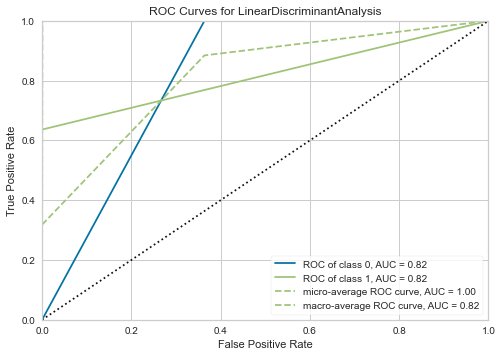

In [22]:
plot_model(tuned_models[0], 'auc')


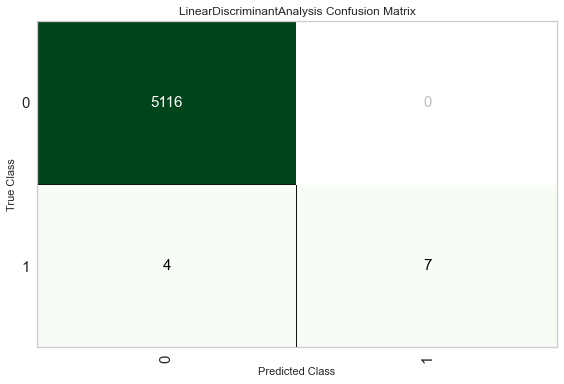

In [23]:
plot_model(tuned_models[0], 'confusion_matrix')

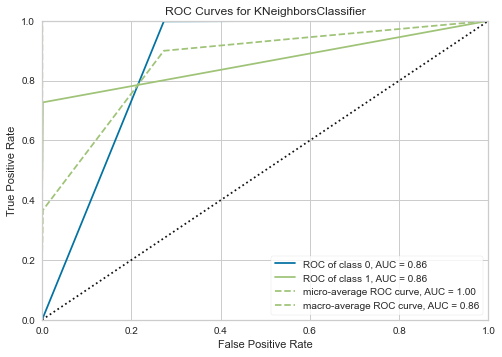

In [24]:
plot_model(tuned_models[1], 'auc')

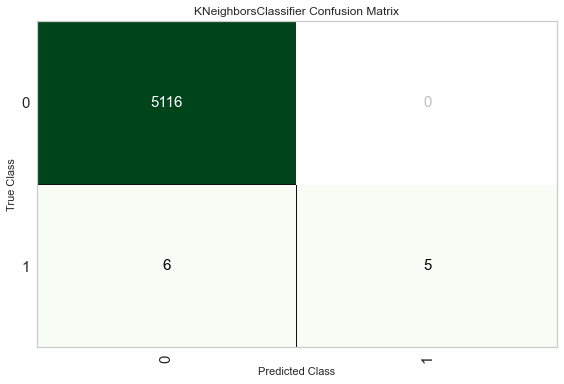

In [25]:
plot_model(tuned_models[1], 'confusion_matrix')

In [26]:
predict_model(tuned_models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9992,0.8181,0.6364,1.0000,0.7778,0.7774,0.7974


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.681632,0.584463,-1.020435,-1.598268,0.461119,-0.147718,-0.615887,0.847271,-0.328639,0.771017,...,-0.589409,1.078137,0.265880,-1.224147,-0.284880,0.093235,1.812863,0,0,1.0
1,0.868987,-1.312301,2.154092,-1.966264,-0.383954,0.274504,-0.918759,0.223832,0.429793,0.739488,...,-0.146634,-1.187495,0.031721,-0.398176,-0.448910,1.327620,-0.375605,0,0,1.0
2,-1.249043,0.655245,0.257930,0.211401,0.499756,-0.211355,-0.789887,0.143814,-0.240905,-0.121685,...,0.189900,0.610140,0.483857,0.188143,-0.042026,0.103074,-0.371334,0,0,1.0
3,0.987224,1.047982,-0.102520,-0.794922,0.439445,-0.114615,-0.807344,0.138729,-0.238872,0.669649,...,0.451572,-0.233335,-0.414004,0.143733,-0.163486,-0.171550,-0.292806,0,0,1.0
4,1.107221,-0.829141,1.267017,-0.919855,-0.639542,1.197073,-0.859878,1.668059,-0.661697,0.338142,...,-0.509821,1.111966,0.535972,1.158273,0.064624,1.173354,-0.315510,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,-1.012213,-3.754926,-4.121319,-0.046338,-0.022374,-0.350368,0.314494,1.618086,-0.497533,-0.035882,...,4.480566,-0.388979,2.853021,-0.188380,-3.046412,12.195027,1.754294,0,0,1.0
5123,-1.528304,0.636150,0.130828,0.427630,0.526357,-0.345681,-0.491053,-0.189416,-0.067966,1.149060,...,0.245044,0.369462,0.235459,0.089093,-0.167100,0.003911,-0.371334,0,0,1.0
5124,1.250468,1.068223,-0.117751,-1.570853,0.161568,0.413753,-0.899174,0.621397,-0.429690,0.329446,...,-0.252065,-1.074054,0.767443,1.795348,-0.340178,-0.251889,-0.122849,0,0,1.0
5125,-1.242481,0.685557,0.199465,-0.037631,0.367958,0.015775,-0.454271,0.064725,-0.142237,0.078163,...,0.043114,-0.845197,0.628416,0.304357,-0.060929,0.070316,-0.374341,0,0,1.0


In [27]:
predict_model(tuned_models[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9988,0.8631,0.4545,1.0000,0.6250,0.6245,0.6738


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.681632,0.584463,-1.020435,-1.598268,0.461119,-0.147718,-0.615887,0.847271,-0.328639,0.771017,...,-0.589409,1.078137,0.265880,-1.224147,-0.284880,0.093235,1.812863,0,0,1.0
1,0.868987,-1.312301,2.154092,-1.966264,-0.383954,0.274504,-0.918759,0.223832,0.429793,0.739488,...,-0.146634,-1.187495,0.031721,-0.398176,-0.448910,1.327620,-0.375605,0,0,1.0
2,-1.249043,0.655245,0.257930,0.211401,0.499756,-0.211355,-0.789887,0.143814,-0.240905,-0.121685,...,0.189900,0.610140,0.483857,0.188143,-0.042026,0.103074,-0.371334,0,0,1.0
3,0.987224,1.047982,-0.102520,-0.794922,0.439445,-0.114615,-0.807344,0.138729,-0.238872,0.669649,...,0.451572,-0.233335,-0.414004,0.143733,-0.163486,-0.171550,-0.292806,0,0,1.0
4,1.107221,-0.829141,1.267017,-0.919855,-0.639542,1.197073,-0.859878,1.668059,-0.661697,0.338142,...,-0.509821,1.111966,0.535972,1.158273,0.064624,1.173354,-0.315510,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,-1.012213,-3.754926,-4.121319,-0.046338,-0.022374,-0.350368,0.314494,1.618086,-0.497533,-0.035882,...,4.480566,-0.388979,2.853021,-0.188380,-3.046412,12.195027,1.754294,0,0,1.0
5123,-1.528304,0.636150,0.130828,0.427630,0.526357,-0.345681,-0.491053,-0.189416,-0.067966,1.149060,...,0.245044,0.369462,0.235459,0.089093,-0.167100,0.003911,-0.371334,0,0,1.0
5124,1.250468,1.068223,-0.117751,-1.570853,0.161568,0.413753,-0.899174,0.621397,-0.429690,0.329446,...,-0.252065,-1.074054,0.767443,1.795348,-0.340178,-0.251889,-0.122849,0,0,1.0
5125,-1.242481,0.685557,0.199465,-0.037631,0.367958,0.015775,-0.454271,0.064725,-0.142237,0.078163,...,0.043114,-0.845197,0.628416,0.304357,-0.060929,0.070316,-0.374341,0,0,1.0


In [30]:
final_model = finalize_model(tuned_models[0])

In [31]:
deploy_model(model = final_model, model_name = 'LDA_deployed', platform = 'aws', authentication = {'bucket':'mlopsassignment2'})

Model Successfully Deployed on AWS S3


In [32]:
final_model2 = finalize_model(tuned_models[1])

In [33]:
deploy_model(model = final_model2, model_name = 'KNC_deployed', platform = 'aws', authentication = {'bucket':'mlopsassignment2'})

Model Successfully Deployed on AWS S3


In [34]:
!mlflow ui

^C
